<a href="https://colab.research.google.com/github/JosephDonoso/ADA-Informes/blob/main/Informe_QuickSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Informe QuickSort**

## **1. Problema: Ordenamiento de una secuencia de números**
>Dado un arreglo $n$ de elementos ordenables, genere una permutación de la secuencia lógica, tal que los elementos del arreglo queden ordenados de menor a mayor.

**Entrada**: Secuencia de $n$ números $[a_1,a_2,...,a_n]$

**Salida**: Permutación ordenada de la secuencia, tal que $a_1'\leq a_2' \leq... \leq a_n'$.

## **2. QuickSort**

### **2.1. Descripción del algoritmo**
El QuickSort es un algoritmo de ordenamiento que utiliza el paradigma de divide y vencerás, creado por el científico Charles Antony Richard Hoare, la implementación realizada es de su variante recursiva.  

El algoritmo esta compuesto por dos funciones, la función recursiva QuickSort,
que recibe un arreglo de elementos y el rango a ordenar con variables de nombre $low$ y $high$, esta función utiliza la implementación de un método llamado Partition que se encarga de separar los números del arreglo en torno a un pivote, deja a los menores números que el pivote a la izquierda y los mayores a la derecha para posteriormente realizar 2 llamados recursivo por cada sub arreglo, rangos de $low$ al $pivote-1$ y del $pivote+1$ al $high$, así hasta que los subarreglos resultantes contengan solo un elemento que no será procesado. 

El método Partition se encarga de comparar cada elemento del subarreglo de entrada con respecto a un pivote escogido, donde se implementarán 3 variantes para escoger pivote, y los organiza en rango de $low$ al $pivote-1$ los que son menor o igual a pivote y los mayores se organizan en el rango $pivote+1$ al $high$.

Partition funciona de la siguiente forma, se escoge un elemento del arreglo como pivote, se ubica a este en la última posición del arreglo $A[high]$, se realiza un ciclo for con una variable $j$ en rangos de $low$ a $high-1$, a una variable $i$ se le asigna la posición $low-1$, $i$ y $j$ serán los indices que indicarán los rangos de elementos menores y mayores al pivote respectivamente. Se comienza a iterar $j$, si $A[j]$ es mayor al pivote el indice $j$ aumenta en 1 ( $j = j+1$ ), pero si es menor el elemento $A[j]$ se intercambia con $A[i+1]$ y ambos índices $i,j$ aumenta en uno. Al finalizar las iteraciones el pivote ( $A[high]$ ) se intercambia con el elemento siguiente a $i$ ( $A[i+1]$ ), dando como resultado la siguiente representación.

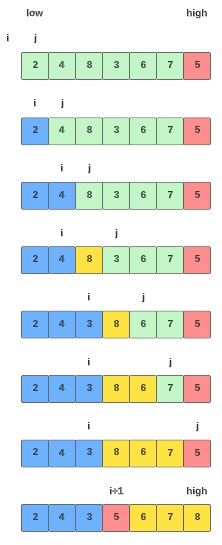

Las variantes para escoger el pivote son, escogiendo el último elemento, escogiendo el primer elemento y escogiendo la mediana de 3 elementos al azar del arreglo.

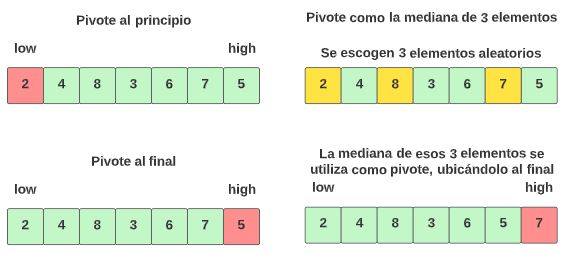

### **2.2. Implementación del algoritmo**

In [40]:
import random
import statistics
from termcolor import colored
import copy

In [41]:
def PartitionLast(A, low, high, verbose, c):
  pivot = A[high] #Se escoge como pivote al último elemento
  i = low - 1
  if verbose:
    print("Método partition\nEntrada")
    print( str(A[low : high])[1:-1], "\b,", colored(f"{str(A[high:high+1])[1:-1]}","yellow"))

  for j in range(low, high): #Se itera j comparando de izquierda a derecha con el pivote
    c += 1
    if A[j] <= pivot: #Solo si encuentre un elemento menor o igual lo intercambia con el que se encuentre en la posición i
      i = i + 1
      (A[i], A[j]) = (A[j], A[i])
    
    if verbose:
      if i == (low - 1):
        if j+1 == high:
          print( colored(f"{str(A[low : j+1])[1:-1]}","red"), "\b," , colored(f"{str(A[high:high+1])[1:-1]}","yellow"))
        else:
          print( colored(f"{str(A[low : j+1])[1:-1]}","red"), "\b,", str(A[j+1 : high])[1:-1], "\b," , colored(f"{str(A[high:high+1])[1:-1]}","yellow"))
      else:
        if i == j:
          if i+1 == high:
            print( colored(f"{str(A[low : i+1])[1:-1]}","blue"), "\b," ,colored(f"{str(A[high:high+1])[1:-1]}","yellow"))
          else:
            print( colored(f"{str(A[low : i+1])[1:-1]}","blue"), "\b," , str(A[j+1 : high])[1:-1], "\b," , colored(f"{str(A[high:high+1])[1:-1]}","yellow"))
        else:
          if j+1 == high:
            print( colored(f"{str(A[low : i+1])[1:-1]}","blue"), "\b," ,colored(f"{str(A[i+1 : j+1])[1:-1]}","red"), "\b," , colored(f"{str(A[high:high+1])[1:-1]}","yellow"))
          else:
            print( colored(f"{str(A[low : i+1])[1:-1]}","blue"), "\b," ,colored(f"{str(A[i+1 : j+1])[1:-1]}","red"), "\b,", str(A[j+1 : high])[1:-1], "\b," , colored(f"{str(A[high:high+1])[1:-1]}","yellow"))


  (A[i + 1], A[high]) = (A[high], A[i + 1]) #Se ubica al pivote en la posición de i + 1
  if verbose:
    print("Ubicando el pivote")
    if i+1 == low:
      print( colored(f"{str(A[i+1 : i+2])[1:-1]}","yellow"), "\b," , colored(f"{str(A[i+2:high+1])[1:-1]}","red"))
    elif i+1 == high:
      print( colored(f"{str(A[low : i+1])[1:-1]}","blue"), "\b," ,colored(f"{str(A[i+1 : i+2])[1:-1]}","yellow"))
    else:
      print( colored(f"{str(A[low : i+1])[1:-1]}","blue"), "\b," ,colored(f"{str(A[i+1 : i+2])[1:-1]}","yellow"), "\b," , colored(f"{str(A[i+2:high+1])[1:-1]}","red"))

  return (i + 1), c

In [42]:
def PartitionFirst(A, low, high, verbose, c):
  pivot = A[low] #Se escoge como pivote al primer elemento
  i = high + 1

  for j in range(high, low, -1): #Se itera j comparando de derecha a izquierda con el pivote
    c += 1
    if A[j] > pivot:
      i = i - 1
      (A[i], A[j]) = (A[j], A[i]) #Solo si encuentre un elemento mayor lo intercambia con el que se encuentre en la posición i
  
  (A[i - 1], A[low]) = (A[low], A[i - 1]) #Se ubica al pivote en la posición de i - 1

  return (i - 1), c

In [43]:
def mediana(A, low, high, verbose):

  indxRand = []
  valueRand = []
  for i in range(3):
    indxRand.append(random.randint(low, high)) #Obtiene 3 indices aleatorios
    valueRand.append(A[indxRand[i]]) #Guarda los tres elementos a los que apuntan esos indices

  if verbose:
    print("Obteniendo 3 elementos al azar y utilizar la mediana entre estos")
    for i in range(low, high + 1):
      if(i == indxRand[0] or i == indxRand[1] or i == indxRand[2]):
        if(i != high):
          print(colored(f"{str(A[i:i+1])[1:-1]}","yellow"), "\b,", end=" ")
        else:
          print(colored(f"{str(A[i:i+1])[1:-1]}","yellow"))
      else:
        if(i != high):
          print(A[i] , "\b,", end=" ")
        else:
          print(str(A[i]))

  medianAux = statistics.median( valueRand ) #Calcula la mediana de los 3 elementos

  for i in range(3):
    if(medianAux == A[indxRand[i]]): #Recorre los indices aleatorios para retornar al que apuntaba al valor de mediana
      return indxRand[i]

In [44]:
def PartitionMedian(A, low, high, verbose, c):
  m = mediana(A, low, high, verbose) #Obtiene el indice de la mediana de 3 datos aleatorios
  (A[m], A[high]) = (A[high], A[m]) #Lo ubica al final

  pivot = A[high] #Se escoge como pivote al último elemento
  i = low - 1
  if verbose:
    print("Método partition\nEntrada")
    print( str(A[low : high])[1:-1], "\b,", colored(f"{str(A[high:high+1])[1:-1]}","yellow"))

  for j in range(low, high): #Se itera j comparando de izquierda a derecha con el pivote
    c += 1
    if A[j] <= pivot: #Solo si encuentre un elemento menor o igual lo intercambia con el que se encuentre en la posición i
      i = i + 1
      (A[i], A[j]) = (A[j], A[i])
    
    if verbose:
      if i == (low - 1):
        if j+1 == high:
          print( colored(f"{str(A[low : j+1])[1:-1]}","red"), "\b," , colored(f"{str(A[high:high+1])[1:-1]}","yellow"))
        else:
          print( colored(f"{str(A[low : j+1])[1:-1]}","red"), "\b,", str(A[j+1 : high])[1:-1], "\b," , colored(f"{str(A[high:high+1])[1:-1]}","yellow"))
      else:
        if i == j:
          if i+1 == high:
            print( colored(f"{str(A[low : i+1])[1:-1]}","blue"), "\b," ,colored(f"{str(A[high:high+1])[1:-1]}","yellow"))
          else:
            print( colored(f"{str(A[low : i+1])[1:-1]}","blue"), "\b," , str(A[j+1 : high])[1:-1], "\b," , colored(f"{str(A[high:high+1])[1:-1]}","yellow"))
        else:
          if j+1 == high:
            print( colored(f"{str(A[low : i+1])[1:-1]}","blue"), "\b," ,colored(f"{str(A[i+1 : j+1])[1:-1]}","red"), "\b," , colored(f"{str(A[high:high+1])[1:-1]}","yellow"))
          else:
            print( colored(f"{str(A[low : i+1])[1:-1]}","blue"), "\b," ,colored(f"{str(A[i+1 : j+1])[1:-1]}","red"), "\b,", str(A[j+1 : high])[1:-1], "\b," , colored(f"{str(A[high:high+1])[1:-1]}","yellow"))


  (A[i + 1], A[high]) = (A[high], A[i + 1]) #Se ubica al pivote en la posición de i + 1
  if verbose:
    print("Ubicando el pivote")
    if i+1 == low:
      print( colored(f"{str(A[i+1 : i+2])[1:-1]}","yellow"), "\b," , colored(f"{str(A[i+2:high+1])[1:-1]}","red"))
    elif i+1 == high:
      print( colored(f"{str(A[low : i+1])[1:-1]}","blue"), "\b," ,colored(f"{str(A[i+1 : i+2])[1:-1]}","yellow"))
    else:
      print( colored(f"{str(A[low : i+1])[1:-1]}","blue"), "\b," ,colored(f"{str(A[i+1 : i+2])[1:-1]}","yellow"), "\b," , colored(f"{str(A[i+2:high+1])[1:-1]}","red"))

  return (i + 1), c

In [96]:
def quick_sort(A, low, high, partition = PartitionLast, verbose = False, c = 0):
  if low < high: #Procesa al subarreglo solo si contiene más de un elemento
    if verbose:
      print("\nArreglo ingresado en QuickSort: ", A[low: high+1])

    #Recurre al método partition entregado para obtener el índice que separará el arreglo en 2 partes
    pivote, c = partition(A, low, high, verbose, c) 
    c = quick_sort(A, low, pivote - 1, partition, verbose, c) #Se llama recursivamente a QuickSort con la sección izquierda al pivote
    c = quick_sort(A, pivote + 1, high, partition, verbose, c) #Se llama recursivamente a QuickSort con la sección derecha al pivote

  return c


In [46]:
A = [4,1,3,0,2]
c = quick_sort(A, 0, len(A) - 1, PartitionLast)
  
print("\nArreglo ordenado:", A)
print("Número de comparaciones:", c)


Arreglo ordenado: [0, 1, 2, 3, 4]
Número de comparaciones: 6


### **2.3. Ejemplo**
Para el ejemplo se utilizará la variante PartitionLast, donde se recorre el arreglo para comparar de izquierda a derecha. PartitionFirst realiza el mismo método pero recorriendo de derecha a izquierda y PartitionMedian, solo se diferencia en que escoge un pivote de 3 números al azar antes de hacer el procedimiento.

Considerando el arreglo:

$A=[4,1,3,0,2]$ 

1.- En el primer llamado a **QuickSort**:

Se llamará a la función Partition que subdividirá el arreglo original en 2.

Partition escogerá como pivote al elemento en la última posición del arreglo asignará a una variable índice $i = low - 1$ y otra variable índice $j = low$ que recorrerá el arreglo desde la primera posición a la última menos uno,
organizando los elementos entre $low$ e $i$ los que son menores al pivote y entre $j$ a $high - 1$ los que son mayores al pivote.

**Partition**:

$i = -1$ || $j = 0$ || $pivote = 2$

Compará el elemento $A[j]$ con el $pivote$:

$ 4 > 2$ , entonces no se realizan intercambios y $j$ aumenta en uno.

$A=[4,1,3,0,2]$

$i = -1$ || $j = 1$ || $pivote = 2$

Compará el elemento $A[j]$ con el $pivote$:

$ 1 < 2$ , entonces se intercambia $A[j]$ con $A[i+1]$, $i$ y $j$ aumentan en uno.

$A=[1,4,3,0,2]$

$i = 0$ || $j = 2$ || $pivote = 2$

Compará el elemento $A[j]$ con el $pivote$:

$ 3 > 2$ , entonces no se realizan intercambios y $j$ aumenta en uno.

$A=[1,4,3,0,2]$

Última iteración de $j$. 

$i = 0$ || $j = 3$ || $pivote = 2$

Compará el elemento $A[j]$ con el $pivote$:

$ 0 < 2$ , entonces se intercambia $A[j]$ con $A[i+1]$, $i$ aumenta en uno.

$A=[1,0,3,4,2]$ , $i = 1$

Finalmente se intercambia el pivote con el elemento en la posición $i+1$

$A=[1,0,2,4,3]$

2.- Se realiza llamado a **QuickSort** con arreglo $A = [1,0]$:

**Partition**:

Primera y última iteración de $j$. 

$i = -1$ || $j = 0$ || $pivote = 0$

Compará el elemento $A[j]$ con el $pivote$:

$ 1 > 0$ , entonces no se realizan intercambios.

$A=[1,0,2,4,3]$ , $i = -1$

Finalmente se intercambia el pivote con el elemento en la posición $i+1$

$A=[0,1,2,4,3]$

3.- Se realiza llamado a **QuickSort** con arreglo $A = [4,3]$:

En este caso $low$ será 3 y $high$ será 4.

**Partition**:

Primera y última iteración de $j$. 

$i = 2$ || $j = 3$ || $pivote = 3$

Compará el elemento $A[j]$ con el $pivote$:

$ 4 > 3$ , entonces no se realizan intercambios.

$A=[0,1,2,4,3]$ , $i = 2$

Finalmente se intercambia el pivote con el elemento en la posición $i+1$

$A=[0,1,2,3,4]$

**Resultado =** $[0,1,2,3,4]$

Y ya conseguimos el arreglo ordenado.

#### **Imagen del ejemplo**


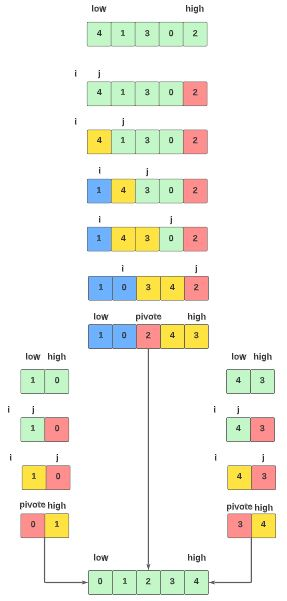

In [48]:
A = [4,1,3,0,2]
c = quick_sort(A, 0, len(A) - 1, PartitionLast, True)
  
print("\nArreglo ordenado:", A)
print("Número de comparaciones:", c)


Arreglo ingresado en QuickSort:  [4, 1, 3, 0, 2]
Método partition
Entrada
4, 1, 3, 0 , 2
4 , 1, 3, 0 , 2
1 , 4 , 3, 0 , 2
1 , 4, 3 , 0 , 2
1, 0 , 3, 4 , 2
Ubicando el pivote
1, 0 , 2 , 4, 3

Arreglo ingresado en QuickSort:  [1, 0]
Método partition
Entrada
1 , 0
1 , 0
Ubicando el pivote
0 , 1

Arreglo ingresado en QuickSort:  [4, 3]
Método partition
Entrada
4 , 3
4 , 3
Ubicando el pivote
3 , 4

Arreglo ordenado: [0, 1, 2, 3, 4]
Número de comparaciones: 6


### **2.4. Ejecución paso a paso (Verbose = True)**
Verbose aplicado para la variante PartitionLast y PartitionMedian.

In [49]:
A = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
c = quick_sort(A, 0, len(A) - 1, PartitionLast, True)
  
print("\nArreglo ordenado:", A)
print("Número de comparaciones:", c)


Arreglo ingresado en QuickSort:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Método partition
Entrada
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14 , 15
1 , 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14 , 15
1, 2 , 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14 , 15
1, 2, 3 , 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14 , 15
1, 2, 3, 4 , 5, 6, 7, 8, 9, 10, 11, 12, 13, 14 , 15
1, 2, 3, 4, 5 , 6, 7, 8, 9, 10, 11, 12, 13, 14 , 15
1, 2, 3, 4, 5, 6 , 7, 8, 9, 10, 11, 12, 13, 14 , 15
1, 2, 3, 4, 5, 6, 7 , 8, 9, 10, 11, 12, 13, 14 , 15
1, 2, 3, 4, 5, 6, 7, 8 , 9, 10, 11, 12, 13, 14 , 15
1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 12, 13, 14 , 15
1, 2, 3, 4, 5, 6, 7, 8, 9, 10 , 11, 12, 13, 14 , 15
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 , 12, 13, 14 , 15
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 , 13, 14 , 15
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13 , 14 , 15
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14 , 15
Ubicando el pivote
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14 , 15

Arreglo ing

In [50]:
A = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
c = quick_sort(A, 0, len(A) - 1, PartitionMedian, True)
  
print("\nArreglo ordenado:", A)
print("Número de comparaciones:", c)


Arreglo ingresado en QuickSort:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Obteniendo 3 elementos al azar y utilizar la mediana entre estos
1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15
Método partition
Entrada
1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 11, 12, 13, 14 , 10
1 , 2, 3, 4, 5, 6, 7, 8, 9, 15, 11, 12, 13, 14 , 10
1, 2 , 3, 4, 5, 6, 7, 8, 9, 15, 11, 12, 13, 14 , 10
1, 2, 3 , 4, 5, 6, 7, 8, 9, 15, 11, 12, 13, 14 , 10
1, 2, 3, 4 , 5, 6, 7, 8, 9, 15, 11, 12, 13, 14 , 10
1, 2, 3, 4, 5 , 6, 7, 8, 9, 15, 11, 12, 13, 14 , 10
1, 2, 3, 4, 5, 6 , 7, 8, 9, 15, 11, 12, 13, 14 , 10
1, 2, 3, 4, 5, 6, 7 , 8, 9, 15, 11, 12, 13, 14 , 10
1, 2, 3, 4, 5, 6, 7, 8 , 9, 15, 11, 12, 13, 14 , 10
1, 2, 3, 4, 5, 6, 7, 8, 9 , 15, 11, 12, 13, 14 , 10
1, 2, 3, 4, 5, 6, 7, 8, 9 , 15 , 11, 12, 13, 14 , 10
1, 2, 3, 4, 5, 6, 7, 8, 9 , 15, 11 , 12, 13, 14 , 10
1, 2, 3, 4, 5, 6, 7, 8, 9 , 15, 11, 12 , 13, 14 , 10
1, 2, 3, 4, 5, 6, 7, 8, 9 , 15, 11, 12,

*   Color amarillo: Denotará al pivote o bien para la variante PertitionMedian, también representa las 3 opciones de pivote escogidos al azar .
*   Color azul: Denotará los elmentos menores al pivote.
*   Color rojo: Denotarán los elementos mayores al pivote.



## **3. Tiempo de ejecución**




#### **Teorema (Tiempo de ejecución)**.
*El algoritmno **QuickSort** tiene un tiempo de ejecución $O(n^2)$ en el peor caso.*

El peor de los casos se da en arreglos totalmente ordenados, utilizando una función PartitionLast o PartitionLastFirst, esto debido a que el algoritmo siempre escogerá como pivote al mayor o al menor de todos los elementos, lo que provocaría que los arreglos se subdividan en uno vacío y otro casi lleno. Si en todas las recursiones pasase el mismo fenómeno, tendríamos una altura del árbol igual a n, con n como la cantidad de elementos y realizando en cada nivel n-1 comparaciones, a eso conduce el teorema de que en el peor caso es O(n^2). Siguiendo la explicación esto es lo que tendría que ocurrir en cada recursión.

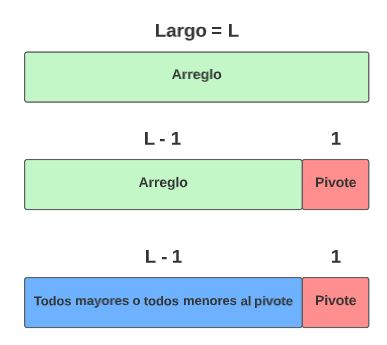

### **Prueba del Teorema usando árbol de recurrencia**
Para realizar el árbol de recurrencia debemos primeramente modelar el comportamiento del árbol con su función recursiva, esto se realiza con tres pasos.
#### **Divide:**
La complejidad temporal del algoritmo cuando divide el arreglo en dos hasta llegar a un elemento es constante, de $Θ(1)$.
#### **Conquista:**
La complejidad del problema original $T(n)$, recursivamente se divide en 2 subproblemas uno de tamaño $Θ(1)$ y el otro de tamaño $n-1$.
#### **Combina:**
La función Partition recorre el problema, ordenando los menores a la izquierda y los mayores a la derecha del arreglo, con una complejidad igual al número de elementos $n$, complejidad de $Θ(n)$.

**Obtenemos:** 

$T(n) = \begin{cases} Θ(1) & \text{Si } n = 1 \\ T(n-1)+ Θ(1) + Θ(n) & \text{Si } n > 1 \end{cases}$

**Reescribiendo:**

$T(n) = \begin{cases} c & \text{Si } n = 1 \\ T(n-1) + c + cn & \text{Si } n > 1 \end{cases}$

Entonces, según la función, el problema comienza siendo $T(n)$ y para la segunda recursión se deja atras una complejidad de $c$, realizamos otra recursión sobre el problema $T(n-1)$. Como una sola ramificación de un árbol, por cada uno de los problemas se deja atras una complejidad de $c$ y otro problema dsiminuido en 1. Se realizan recursiones hasta que $n$ sea igual a 1, lo que ocurrirá en $n$ recursiones y para calcular todas las complejidades dejadas atrás (cn + c(n-1) + c(n-2) +...+ c) se realiza la siguiente sumatoria.

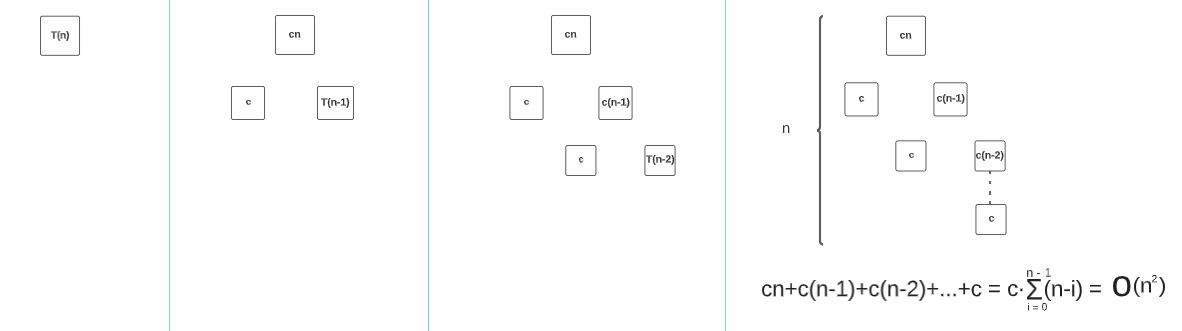

#### **Teorema (Tiempo de ejecución)**.
*El algoritmno **QuickSort** tiene un tiempo de ejecución $O(nlog(n)$ en el mejor caso.*

El mejor caso para este algoritmo sucede cuando el pivote escogido es la media de todos los elementos del arreglo entregado a la función en cada recursión. Que sea la mediana de los datos significa que existen la misma, o casi la misma en casos de arreglo con tamaño par, cantidad de datos menores al pivote que datos mayores a este. Siguiendo la explicación esto es lo que tendría que ocurrir en cada recursión.

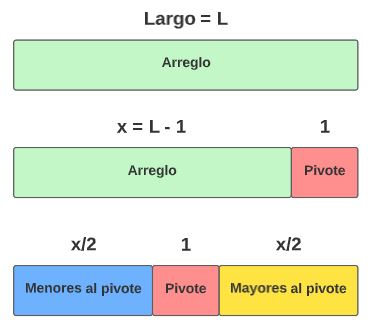

### **Prueba del Teorema usando árbol de recurrencia**
Para realizar el árbol de recurrencia debemos primeramente modelar el comportamiento del árbol con su función recursiva, esto se realiza con tres pasos.
#### **Divide:**
La complejidad temporal del algoritmo cuando divide el arreglo en dos hasta llegar a un elemento es constante, de $Θ(1)$.
#### **Conquista:**
La complejidad del problema original $T(n)$, recursivamente se divide en 2 subproblemas de tamaño $n/2$, es decir, $2T(n/2)$.
#### **Combina:**
La función Partition recorre el problema ordenando los menores a la izquierda y los mayores a la derecha, con una complejidad igual al número de elementos $n$, complejidad de $Θ(n)$.

**Obtenemos:** 

$T(n) = \begin{cases} Θ(1) & \text{Si } n = 1 \\ 2T(n/2) + Θ(n) & \text{Si } n > 1 \end{cases}$

**Reescribiendo:**

$T(n) = \begin{cases} c & \text{Si } n = 1 \\ 2T(n/2) + cn & \text{Si } n > 1 \end{cases}$

Entonces, según la función, el problema comienza siendo $T(n)$ y para la segunda recursión se deja atras una complejidad de $cn$, realizamos otra recursión sobre los $2T(n/2)$ como ramificaciones de un árbol, por cada uno de los subproblemas se deja atras una complejidad de $cn/2$, que en total suman $cn$ ($cn/2 + cn/2 = cn$), y otros dos pares de $T(n/4)$. Se realizan recursiones hasta que $n$ sea igual a 1, lo que ocurrirá en $log_2(n)$ recursiones y por cada una se dejó atras una complejidad de $cn$, más el primer $cn$ el algoritmo tiene un costo total de $cn(log_2(n)) +cn$, complejidad de $Θ(n(log(n))$.

### **Ejemplo**
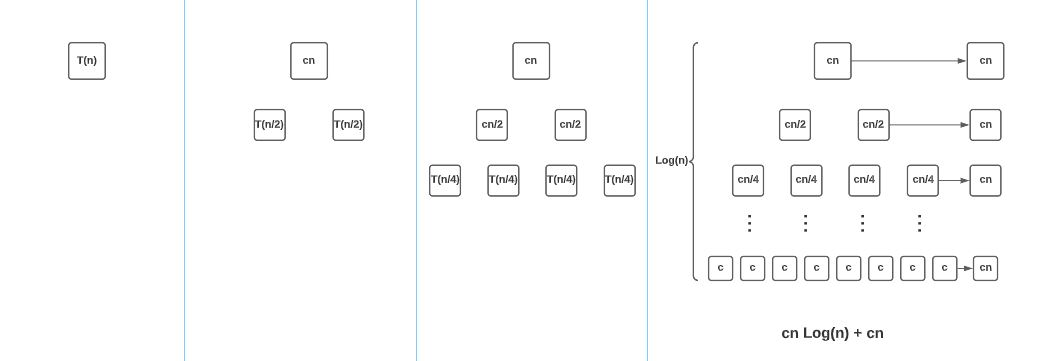

## **4. Correctitud**

### **4.1. Teorema 1 (Correctitud de la función Partition)**

*El algoritmo Partition retorna un recibe un arreglo $A[p..r]$, lo reorganiza y retorna un índice $q$ de tal forma que los elementos del arreglo $A[p..q-1]$ son menores o iguales a $A[q]$ y los elementos del arreglo $A[q+1..r]$ son mayores a $A[q]$.*

#### **Propiedad invariante de bucle**
>Al comienzo de cada iteración, se cumple que para cualquier índice k:
>
>Si $p ≤ k ≤ i$, entonces $A[k]≤A[r]$
>
>Si $i<k<j$, entonces $A[k]>A[r]$

#### **Inicialización**
Al comienzo de la primera iteración, para los índices $i = p-1$ y $j = p$, $k$ solo podrá ser $< p$ y dado que este representa posiciones en el arreglo, el conjunto de los elementos $A[k] ≤ pivote$ y $A[k] > pivote$ estarán vacíos. Al finalizar la iteración se comparará al primer elemento en posición $j$, agregándose al conjunto de desde $p$ a $i$ ó desde $i+1$ a $j$ dependiendo si es mayor o menor al pivote, cumpliéndose la propiedad para la primera iteración.

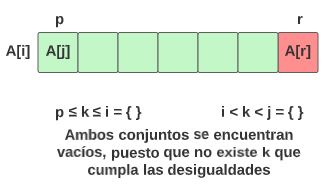

#### **Mantención**
Al comienzo de la $n$-ésima iteración el índice $j$ será igual a $p + n - 1$ y se cumplirá que $i<j<r$, entonces para el conjuntos de los números $A[k]$ con $p<=k<=i$, este contendrá $m = (i-p) +1$ elementos $A[k] <= pivote$ y para el conjunto $i<k<j$ el conjunto contendrá $o = (j-i) -1$ elementos $A[k] > pivote$. La cantidad de elementos comparados al comienzo de cada iteración será igual a $j - p$ o dicho de otra forma $n - 1$, con $n$ como la $n$-ésima iteración, asegurando de esta forma su correctitud.

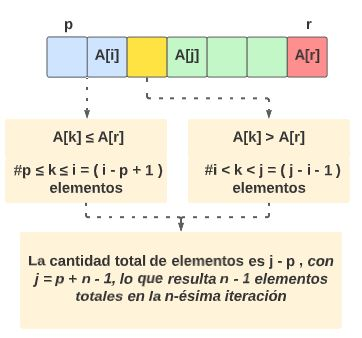



### **4.2. Teorema 2 (Correctitud de la función QuickSort)**

*El algoritmo **QuickSort** genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir,* $a_1'\leq a_2' \leq... \leq a_n'$.

#### **Por inducción matemática**
>Probar $P(n)$ para un caso base.
>
>Probar que si $P(n)$ es cierto, entonces $P(n+1)$ también lo es.

Para el caso base $P(1)$, QuickSort no procesará el arreglo de largo $n = 1$, el cual se encontrará ordenado por ser un solo elemento.
Para un problema $P(n)$, lo que ocurrirá es que en un posterior llamado a QuickSort este resolverá problemas entre $P(n-1)$ y $P(n/2)$, ambos menores a $n$, posteriormente será un problema menor y así sucesivamente hasta tener muchos problemas en el caso base $P(1)$, donde se cumple que los subarreglos de $n=1$ están ordenados. Si el problema es $P(k)$ con $k < n$, ocurrirá lo mismo que sucedió con $n$, los problemas serán cada vez menores hasta llegar nuevamente a $P(1)$.

Como se detalló anteriormente se cumple que el algoritmo es correcto para $P(n)$ y todo $P(k)$ con $k < n$. Lo que ocurrirá con un $P(n+1)$ es que, en el próximo llamado recursivo de QuickSort, generará problemas que pueden variar entre $P(n)$ y $P((n+1)/2)$. Donde se observará que en el peor caso se comportará el problema igual que un $P(n)$ y en otros casos el problema seguirá siendo menor a $n$ , entonces se comprueba que para $P(n+1)$ en próximos llamados a QuickSort ocurrirá igual que con $P(n)$, ordenando los arreglos con Partition y no procesando los subarreglos ordenados de un elemento, para obtener como resultado un **arreglo ordenado**.

## **5. Experimentos**

### **5.1. Número de comparaciones mejor y peor caso teóricos**


Las secuencias de entrada son:
*   Mejor caso: Secuencia que se se rige por la fórmula $n*log_2(n)$.
*   Peor caso: Secuencia que se se rige por la fórmula $n^2$.
*   Caso aleatorio: La secuencia será un arreglo aleatorio de números entre 1 y 99, con $n$ cantidad de elementos.

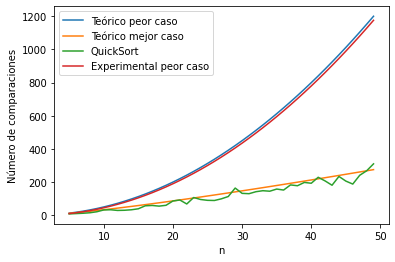

In [130]:
import matplotlib.pyplot as plt
import math

x=[n for n in range(5,50)]
y_teo_worst = [(n * n)/2 for n in range(5,50)] #usando la fórmula descrita en la sección de tiempo de ejecución para el peor caso
y_teo_best = [n * math.log2(n) for n in range(5,50)] #usando la fórmula descrita en la sección de tiempo de ejecución para el mejor caso
y_exp = []
y_exp_worst = []

for n in range(5,50):

  a = random.sample(range(1, 100), n) # n elementos con valores aleatorios
  counter = quick_sort(a, 0, len(a) - 1, PartitionLast)
  y_exp.append(counter)

  counter = quick_sort(a, 0, len(a) - 1, PartitionLast) # n elementos con ordenados
  y_exp_worst.append(counter)


plt.plot(x,y_teo_worst)
plt.plot(x,y_teo_best)
plt.plot(x,y_exp)
plt.plot(x,y_exp_worst)
plt.legend(["Teórico peor caso", "Teórico mejor caso", "QuickSort", "Experimental peor caso"])

plt.xlabel('n')
plt.ylabel('Número de comparaciones')
plt.show()

#### **Análisis de resultados**
Como puede observarse, el caso promedio de QuickSort sigue la complejidad del mejor caso, esto se debe a que el peor caso es demasiado improbable que ocurra, existe una probabilidad de $1$ entre $n$ números de que suceda que el último elemento del arreglo sea el menor de todos o el mayor de todos, y en el peor caso esto tendría que ocurrir en cada recursión. Es mucho más probable de que el último elemento del arreglo sea un número intermedio, cosa que ocurrirá en casi toda recursión. Además si separamos una ejecución del algoritmo en solo casos buenos y casos malos, aún después de tener el peor de los casos, en la siguiente recursión seguirá dividiendo el arreglo, acercándose mucho más rápido al mejor de los casos que al peor.


### **5.2. Comparar QuickSort con MergeSort**

#### **Implementación del MergeSort**

In [52]:
#Función Merge
def Merge(L, R, c, verbose):
  A = []
  if(verbose): print("Comparaciones:")
  while(True):

    if(len(L) == 0):
      while(len(R)>0):
        if(verbose):
          if(len(R) == 1):
            print("L = ", colored(f"[ø] ", "red"), "R = ", colored(f"{str(R[0:1])}","red") )
          else:
            print("L = ", colored(f"[ø] ", "red"), "R = ", colored(f"{str(R[0:1])}","red"), str(R[1:]) )
        c += 1
        A.append(R.pop(0))
      return A, c
    
    if(len(R) == 0):
      while(len(L)>0):
        if(verbose):
          if(len(L) == 1):
            print("L = ", colored(f"{str(L[0:1])}","red"), " R = ", colored(f"[ø]", "red"))
          else:
            print("L = ", colored(f"{str(L[0:1])}","red"), str(L[1:]), " R = ", colored(f"[ø]", "red"))
        c += 1
        A.append(L.pop(0))
      return A, c

    if(verbose):
      if(len(L) == 1):
        print("L = ", colored(f"{str(L[0:1])}","red"), end="  ")
      else:
        print("L = ", colored(f"{str(L[0:1])}","red"), str(L[1:]), end="  ")
      if(len(R) == 1):
        print("R = ", colored(f"{str(R[0:1])}","red") )
      else:
        print("R = ", colored(f"{str(R[0:1])}","red"), str(R[1:]) )

    if (L[0] <= R[0]):
      c += 1
      A.append(L.pop(0))
    else:
      c += 1
      A.append(R.pop(0))

  return A, c



In [53]:
#Función MergeSort
def MergeSort(A, c = 0, r = 0, verbose = False):
  if (len(A) <= 1): return A, c, r
  r += 1;
  mitad = int(len(A)/2)

  if (verbose):
    print("Llamado a MergeSort con arreglo:")
    print(A)
    print("L = ", colored(f"{str(A[:mitad])}","green"), end=" ")
    print("R = ", colored(f"{str(A[mitad:])}","blue"))

  izq, c, r = MergeSort(A[:mitad], c, r, verbose)
  der, c, r = MergeSort(A[mitad:], c, r, verbose)
  
  A, c = Merge(izq, der, c, verbose)
  if (verbose):
    print("Resultado:")
    print(A, "\n")

  return A , c, r



#### **Tiempo de ejecución**

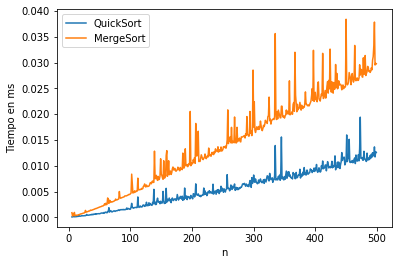

In [97]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
from copy import deepcopy

x=[]
y_Merge = []
y_Quick = []

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  b = deepcopy(a)

  #la función repeat está ejecutando 20 veces merge_sort con el arreglo a y retorna el mejor tiempo obtenido.
  t_merge = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces insertion_sort con el arreglo b y retorna el mejor tiempo obtenido.
  t_quick = repeat(setup="from __main__ import quick_sort", stmt=f"quick_sort({b}, {0}, {len(b)-1})", repeat=1, number=10)

  x.append(n)
  y_Merge.append(t_merge)
  y_Quick.append(t_quick)


plt.plot(x,y_Quick)
plt.plot(x,y_Merge)
plt.legend(["QuickSort", "MergeSort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

#### **Comparaciones**

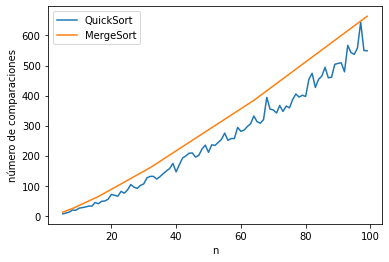

In [111]:
import matplotlib.pyplot as plt

x=[n for n in range(5,100)] 
yM=[];
yQ=[];

for n in range(5,100):
  a = random.sample(range(1, 100), n)
  b = deepcopy(a)

  a,counterM, r = MergeSort(a)
  yM.append(counterM)

  counterQ = quick_sort(b, 0, len(b)-1, PartitionMedian)
  yQ.append(counterQ);

plt.plot(x,yQ)
plt.plot(x,yM)
plt.legend(["QuickSort","MergeSort"])

plt.xlabel('n')
plt.ylabel('número de comparaciones')
plt.show()

#### **Análisis de resultados**
Se puede observar claramente que es mucho más efectivo QuickSort y si a esto le sumamos su variante más óptima conseguimos disminuir en la cantidad de comparaciones del algoritmo. Su eficiencia puede deberse a que QuickSort realiza un ordenamiento y posteriormente una división de sus datos, los subproblemas que genera son la mitad del largo - 1 del arreglo original, lo que en cada recursión resta un elemento a la vez que separa los otros, MergeSort por otra parte debe descomponer el arreglo en todos sus elementos individuales y luego recomponerlo, sin ahorrar ningún proceso como lo hace QuickSort.


### **5.3. Número de comparaciones 3 variantes de QuickSort**

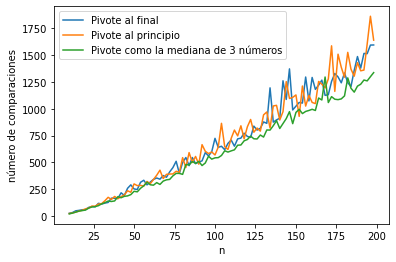

In [112]:
import matplotlib.pyplot as plt

x=[n*2 for n in range(5,100)] 
yLast=[];
yMedian=[];
yFirst=[];

for n in range(5,100):
  a = random.sample(range(1, 100), n)*2
  b = deepcopy(a)
  c = deepcopy(a)

  counterLast = quick_sort(a, 0, len(a)-1, PartitionLast)
  counterFirst = quick_sort(b, 0, len(b)-1, PartitionFirst)
  counterMedian = quick_sort(c, 0, len(c)-1, PartitionMedian)

  yLast.append(counterLast);
  yFirst.append(counterFirst);
  yMedian.append(counterMedian);

plt.plot(x,yLast)
plt.plot(x,yFirst)
plt.plot(x,yMedian)
plt.legend(["Pivote al final", "Pivote al principio", "Pivote como la mediana de 3 números"])

plt.xlabel('n')
plt.ylabel('número de comparaciones')
plt.show()

#### **Análisis de resultados**
Se observa en el gráfico, que entre las 3 variantes para escoger al pivote, hay una que siempre se mantiene por debajo de las otras 2 en número de comparaciones, esta es la variante que calcula la mediana entre 3 números. Esta variante es la más efectiva porque en toda recursión disminuye la probabilidad de obtener un número demasiado alto o demasiado bajo que son los causantes de un bajo rendimiento, porque separan el problema de forma desbalanceada, lo que aumenta la altura del árbol de recursiones que para ser óptimo debe mantenerse en $log_2(n)$.